# 2.4 Exercises

## Conceptual Questions

### **Question 1**

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse that an inflexible method. Justify your answer.

#### (a) The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**Answer**:  With an extremely large sample size and a small number of predictors, a flexible model will perform better than an inflexible model. This is due to the fact that assuming a supervised learning model following the standard bias-variance tradeoff model for an approximation model $\hat{f}$ predicting $y_0$:

$$ 
\begin{align}
    \mathbb{E}(y_0 - \hat{f}(x_0))^2 &= \text{Var}(\hat{f}(x_0)) + [\text{Bias}(\hat{f}(x_0))]^2 + \text{Var}(\epsilon),
\end{align}    
$$

model performance is based upon minimizing the variance and bias terms of $\hat{f}$. With an extremely large sample size, the variance of $\hat{f}$ will be minimized no matter what model flexibility we assume. Flexible models often suffer due to high variance, but due to the extremely large sample size this will be mitigated. However, given a small number of predictors $p$, the bias term will be minimized when we use a flexible model as opposed to an inflexible model. This is because a flexible model that does not assume a linear relationship among the predictors introduces less assumptions of the relationship between the predictors, thereby lowering the bias of $\hat{f}$.

#### (b) The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**Answer:** With an extremely large number of predictors and small number of observations, then an inflexible model will perform better. Referencing equation $(1)$ above, model performance is dependent upon the variance and bias of $\hat{f}$. With a small number of observations, flexible models will suffer from high variance dependent upon the training set. While their bias will be small, this will be offset by the very high variance. In comparison, using an inflexible model (such as assuming a linear relationship among the predictors) will result in less variance dependent upon the training set due to the rigid loss functions of the inflexible model. Their higher bias will be offset by the greatly reduced variance, resulting in an overall improved model performance. This will avoid the common pitfall of overfitting, which is commen when using very flexible models with small sample sizes.

#### (c) The relationship between the predictors and response is highly non-linear.

**Answer:** In the case that the relationship between the predictors and response is highly non-linear, the model with the best performance would be a flexible model. As inflexible models often assume a rigid linear relationship between the predictors (such as linear regression), an inflexible model would not capture the true relationship between the predictors. While an inflexible model $\hat{f}$ following equation $(1)$ would have a low bias term, due to the relationship between the predictors not able to be captured by an inflexible model the variance of $\hat{f}$ (depending upon the training data) would be very high, resulting in poor performance (i.e., underfitting). Using a flexible model would introduce low bias and be better at capturing the relationship among the predictors using the training data, resulting in a lower variance term as well. Note though, that if the sample size was small, a simpler flexible model would be preferable to avoid overfitting.

#### (d) The variance of the error terms, i.e., $\sigma^2 = \text{Var}(\epsilon)$, is extremely high.

**Answer:** In the case that the variance of the error terms is extremely high, then an inflexible model will have the best performance. The reason is that a flexible model will be extremely sensitive to the erradic noise present in the sample data. Following equation $(1)$, a flexible model is very sensitive to the sample data and the variance of $\hat{f}$ will greatly increase due to the randomness of the noise present from the distribution of $\epsilon$. To mitigate overfitting the noise of the model, an inflexible model's rigid structure (such as linear regression) will ignore extreme variation caused by the distribution of $\epsilon$, resulting in overall better model performance. 

### Question 2

Explain whether each scenario is a classification or regression problem, and indicate whether we are more interested in inference or prediction. Finally, provide $n$ and $p$.

#### (a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**Answer:** The above scenario is a regression problem, as we are trying to understand CEO salary, which is a continuous numerical variable and not a categorical variable. In particular, we are more interested in inference rather than prediction, as we wish to understand which factors affect CEO salary as opposed to merely predicting CEO salary based on the prescribed features. In this case, an inflexible model with a rigid structure would be recommended to measure the impact of each feature on model structure and/or performance. Finally, $n = 500$ and $p = 4$.

#### (b) We are considering launching a new product and wish to know whether it will be a *success* or a *failure*. We collect data on 20 similar products that were previously launched. For each product we have recorded whether or not is was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**Answer:** The above scenario is a classification problem, as we are trying to classify products into one of two categories, either *success* or *failure* (i.e., a categorical variable with two possible states). In particular, we are more interested in prediction rather than inference, as the goal is simply to identify which products will be succesful rather than what variables impact product success. In this case, $n=20$ and $p=14$. With such a small sample size and nearly equivalent number of predictors, a simple flexible model is recommended to capture the possible non-linear relationship among the features but also avoid overfitting.

#### (c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

**Answer:** The above scenario is a regression problem, as we are trying to predict the % change which is a continuous numerical variable (bounded by 0% and 100%). In particular, we are more interested in prediction rather than inference, as the goal is to predict the % change rather than understand how the tracked features impact % change. Finally, $n=52$ (52 weeks in a year and data is collected every week) and $p = 4$ (% change in each market). We recommend a flexible model due to the high likelihood that the relationship among the predictors and response is highly non-linear. This, however, means that care must be taken not to overfit due to the small sample size. As such, a simple flexible model is recommended.

### Question 3

We now revisit the bias-variance decomposition.

#### (a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curve, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The $x$-axis should represent the amount of flexibility in the method, and the $y$-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

To answer this question, we will form a plot using the `matplotlib.pyplot` library.

In [3]:
# Import the needed packages
import matplotlib.pyplot as plt             # For plotting
import numpy as np                          # For arrays
from scipy.interpolate import interp1d   # For smooth lines

Next we'll form the graph.

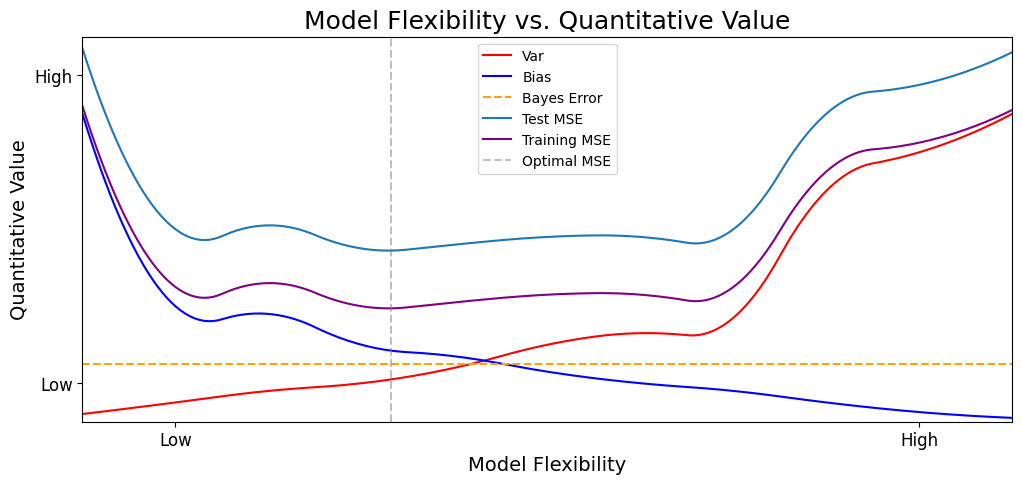

In [4]:
# Set the x and y-axis parameters
x_lim = y_lim = [0, 10]
x_ticks = y_ticks = [1, 9]
x_tick_label = y_tick_label = ['Low', 'High']
tick_font_size = 12

# Set figure labels
x_label = 'Model Flexibility'
y_label = 'Quantitative Value'
label_font_size = 14
title = 'Model Flexibility vs. Quantitative Value'
title_font_size = 18

# Initialize the figure
fig, ax = plt.subplots(figsize=(12,5))

# Set the x-axis
ax.set_xlim(x_lim)
ax.set_xticks(x_ticks, labels=x_tick_label, fontsize=tick_font_size)
ax.set_xlabel(x_label, fontsize = label_font_size)

# Set the y-axis
ax.set_ylim(y_lim)
ax.set_yticks(y_ticks, labels=y_tick_label, fontsize=tick_font_size)
ax.set_ylabel(y_label, fontsize=label_font_size)

# Set the figure label
ax.set_title(title, fontsize=title_font_size)

# Set the range of x-values
x = np.array(range(x_lim[0], x_lim[1]+1, 1))

# Plot the variance
y_var = [0.2, 0.5, 0.8, 1, 1.4, 2, 2.3, 2.7, 6, 7, 8]
cs = interp1d(x, y_var, kind='quadratic')
x_var_smooth = np.linspace(x.min(), x.max(), 200) # Add more x-values for smoother look
y_var_smooth = cs(x_var_smooth)
ax.plot(
    x_var_smooth,
    y_var_smooth,
    '-',
    # label=r'$\text{Var}(\hat{f}(x_0))$',
    label='Var',
    color='r'
)

# Plot the (squared) bias
y_bias = [8, 3, 2.8, 2, 1.7, 1.3, 1, 0.8, 0.5, 0.25, 0.1]
cs = interp1d(x, y_bias, kind='quadratic')
x_bias_smooth = np.linspace(x.min(), x.max(), 200) # Add more x-values for smoother look
y_bias_smooth = cs(x_bias_smooth)
ax.plot(
    x_bias_smooth,
    y_bias_smooth,
    '-',
    # label=r'$[\text{Bias}(\hat{f}(x_0))]^2$',
    label='Bias',
    color='b'
)

# Plot the (Bayes) irreducible error
ax.plot(
    range(0,11,1),
    [1.5]*11, 
    '--', 
    # label=r'$\text{Var}(\epsilon)$',
    label='Bayes Error',
    color='orange'
)

# Plot the test error
y_test_error = y_bias_smooth + y_var_smooth + np.array([1.5]*200)
ax.plot(
    x_bias_smooth,
    y_test_error,
    '-',
    # label=r'$\mathbb{E}(y_0 - \hat{f}(x_0))^2$'
    label='Test MSE'
)

# Plot the training error
ax.plot(
    x_bias_smooth,
    y_bias_smooth + y_var_smooth,
    '-',
    label='Training MSE',
    color='purple'
)

# Plot the optimal MSE
plt.axvline(
    x=x_bias_smooth[np.where(y_test_error == y_test_error.min())],
    linestyle='--',
    color='gray',
    alpha=0.5,
    label='Optimal MSE'
)

ax.legend() # Turn on the legend

plt.show()

#### (b) Explain why each of the five curves has the shape displayed in part (a).

For each of the five curves, we have the above shape as:
- **Variance** : The variance of the MSE (assuming a supervised learning model) is very low for inflexible models due to the rigid structure of their loss functions. However, as model flexibility increases changes to the training set can result in different models $\hat{f}$, thereby resulting in higher variance.
- **Bias** : The bias of the MSE is very high for inflexible models as they assume a strong rigid structure between the predictor variables. As model flexibility increases, this assumption loosens, which lowers the bias of the model $\hat{f}$.
- **Bayes (Irreducible) Error** : The irreducible error is a random variable that is caused by uncontrollable factors, and is assumed to have fixed (albeit, low) variance throughout. 
- **Test MSE** : The test MSE (or test error) is the sum of the three components: the variance, bias, and irreducible error. These three combine to give the average MSE per model $\hat{f}$.
- **Training MSE** : The training MSE (or training error) is the same as above, only limited to the calculations done on the training data (while the test MSE is limited to calculation done on the test data). Since we would expect the model to perform better on the training data (i.e., *known* data) rather than the test data (i.e., *unknown* data), then the training MSE is less (on average) than the test MSE.
- **Optimal MSE** : The optimal MSE is the minimum value of the test MSE, and indicates the recommended model $\hat{f}$ to use in production.

### Question 4

You will now think of some real-life applications for statistical learning.

#### (a) Describe three real-life applications in which *classification* might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

**Answer**: Here are three real-life applications in which classification might be useful:

1) Classifying whether forms collect a demographic data point or not. The response variable would be a Boolean flag (either `True` or `False`) indicating if the form collects the demographic data point in question. Predictors may include, but are not limited to, the form text, program office of the form, detected keywords, etc. The goal of this application would be prediction, as we are not so much concerned with what leads to a flexible model detecting collection, but rather want accurate results of collection.
2) Classifying whether a given recipe uploaded to a cooking webside will drive high user engagement or not. The response variable would be a categorical variable (with categories such as `Low`, `Medium`, and `High`) indicating the likelihood of driving user engagement or not. Predictors may be the category of recipe, time it takes to cook, time for prep, number of ingredients, calories of the dish, and grams of sugar in the dish. Depending on the need, the goal could be inference or prediction. Taking a prediction approach would focus on selecting high likelihood recipes and avoiding low likelihood recipes. Taking an inference approach would let the website identify what type of recipes are driving user engagement.
3) Classifying which neighborhood a family would like to purchase a home in a given city. The response variable would be the recommended neighborhood to purchase a home in. Predictors may be the average home price, local school ratings, location to shopping districts, and available outdoor activities in the neighborhood. This application would have an inference goal, with the purpose of understanding what factors are most important in determining neighborhoods to recommend to customers.

#### (b) Describe three real-life applications in which *regression* might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

**Answer**: Here are three real-life applications in which regression might be useful.

1) Predicting the sale price of a home. The response variable would be the dollar amount that the house is sold for. Predictors may include, but are not limited to, square footage, number of bedrooms, number of bathrooms, and local school rating. The goal of the application would be inference, allowing for determining what factors most influence home price value (either positive or negative). 
2) Predicting the GPA of a student at the end of the semester given their performance in previous courses. The response variable would be the GPA value. Predictors may include, but are not limited to, letter grades assigned to other classes in previous semesters, assigned major, or assigned minor. The goal of the application would be inference or prediction. If inference, identify which classes most directly contribute to success and/or failure in the next semester. If prediction, identify the resulting GPA at the end of the semester (which can be used for likelihood of a student to maintain their scholarship).
3) Predicting the color hue using RGB numerical values of a pixel based upon the color of surrounding pixels. The response variable would be a 3-dimensional numerical vector where each coordinate corresponds to the RGB value, respectively. Predictors would include the 3-dimensional vectors of surrounding pixels. The goal of the application would be prediction, as we are only concerned with setting the unknown pixel's value to a reasonable color and not the predictors that most influence that value.

#### (c) Describe three real-life applications in which *cluster analysis* might be useful.

**Answer**: Here are three real-life applications in which cluster analysis might be useful:

1. Classifying the type of flower species a given flower. This is assuming that the flower species can fit into a select group of categories that can be clustered based upon quantiative variables of the flowers. This would assign a cluster value to a given flower based upon proximity of quantitative variables.
2. Identifying the cluster for which movie genre a subscribed viewer is most interested in watching on a given day. 
3. Identifying the cluster for which a particular news article belongs with regard to political affiliation. This would allows for navigating a shifting political line.

### Question 5

What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

**Answer**: 
The advantages of a flexible model are as follows:

- Better fit for complex relationships among the predictors for capturing non-linear and intricate data structures
- Lower bias
- Higher accuracy on the training data
- More expressive models can capture the relationship between the predictor variables and response variable

The disadvantages of a flexible model are as follows:

- More likely to overfit the training data and capture information caused by noise
- Increased variance
- Larger training time and compute resources to train the model
- Less interpretable and harder to explain to a non-technical audience

The advantages of an inflexible model are as follows:

- Lower risk of overfitting the training data and capturing noise 
- Lower variance
- Lower training time and compute resources to train the model
- More interpretability and easier to explain to non-technical audiences

The disadvantages of an inflexible model are as follows:

- Worse fit for complex relationships among the predictors such as non-linear and intricate data structures
- Increased bias
- Lower accuracy on training data
- Harder to capute the relationship between the predictor variables and response variable (if non-linear)

A more flexible approach would be preferred when:

- Prediction is more important than inference
- The underlying relationship among the predictor and response variables is unknown
- Compute resources are not a concern
- The dataset is large to minimize overfitting 
- Regularization techniques will be applied to mitigate overfitting risks

A less flexible approach would be preferred when:

- Inference is more important than prediction
- The underlying relationship among the predictor and response variables is known (or assumed)
- Compute resources are limited
- The dataset is small or noisy, making overfitting a risk



### Question 6

Describe the difference between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

**Answer**: The key difference between a parametric and a non-parametric statistical learning approach is the assumptions placed upon the form of the model $f$ which is trying to be deduced based upon the training data. Assuming a parametric approach means ascribing a strong known relationship among the predictors, so training the models involves selecting parameters that minimize the loss function with the given underlying structure of $f$. On the other hand, a non-parametric appoach involves no assumptions on the underlying structure of $f$, and seeks to fit a model $\hat{f}$ that most closely resembles the training data rather than a rigid provided structure.

The advantages of a parametric approach are as follows:

- Assumed known relationship about the underlying model $f$
- Training is more linear, involving minimizing the loss function given the parameters of the model structure
- View the predictors within the scope of the underlying model and more easily understand interpretability of the model
- Less susceptible to noise within the dataset and overfitting
- Faster training and fitting of the data

The disadvantages of a parametric approach are as follows:

- Relationship is forced upon the predictors, which may or may not be accurate
- May capture a wrong relationship among the predictor and response variables if underlying structure does not match the prescribed base model
- Introduce more bias into the modeling process than what may be desired
- Poor performance on data that is not structured as assumed

### Question 7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.


$$
\begin{aligned}
    \begin{array}{c|rccl}
        \hline 
        \text{Obs.} & X_1 & X_2 & X_3 & Y \\
        \hline
        1 & 0 & 3 & 0 & \text{Red} \\
        2 & 2 & 0 & 0 & \text{Red} \\
        3 & 0 & 1 & 3 & \text{Red} \\
        4 & 0 & 1 & 2 & \text{Green} \\
        5 & -1 & 0 & 1 & \text{Green} \\
        6 & 1 & 1 & 1 & \text{Red} \\ \hline
    \end{array}
\end{aligned}
$$

Suppose we wish to use this data to make a prediction for $Y$ when $X_1 = X_2 = X_3 = 0$ using $K$-nearest neighbors.


#### (a) Compute the Euclidean distance between each obsersation and the test point, $X_1 = X_2 = X_3 = 0$.

**Answer**: The Euclidean distance for each observation is as follows:

1. $d(\bar{0}, \bar{1}) = \sqrt{(0 - 0)^2 + (0 - 3)^2 + (0 - 0)^2} = \sqrt{9} = 3$
2. $d(\bar{0}, \bar{2}) = \sqrt{(0 - 2)^2 + (0 - 0)^2 + (0 - 0)^2} = \sqrt{4} = 2$
3. $d(\bar{0}, \bar{3}) = \sqrt{(0 - 0)^2 + (0 - 1)^2 + (0 - 3)^2} = \sqrt{10} \approx 3.16$
4. $d(\bar{0}, \bar{4}) = \sqrt{(0 - 0)^2 + (0 - 1)^2 + (0 - 2)^2} = \sqrt{5} \approx 2.24$
5. $d(\bar{0}, \bar{5}) = \sqrt{(0 - (-1))^2 + (0 - 0)^2 + (0 - 1)^2} = \sqrt{2} \approx 1.41$
6. $d(\bar{0}, \bar{6}) = \sqrt{(0 - 1)^2 + (0 - 1)^2 + (0 - 1)^2} = \sqrt{3} \approx 1.73$

#### (b) What is our prediction with $K = 1$? Why?

**Answer**: Using a clustering analysis of one-nearest neighbor with the Euclidean distance, we would classify $Y$ for test point $\bar{0}$ as Green, as the smallest Euclidean distance between $\bar{0}$ and the provided points is $\sqrt{2}$ with observation 5. With $K = 1$ we are only concerned with the cluster associated with the observation closest to $\bar{0}$.

#### (c) What is our prediction with $K = 3$? Why?

**Answer:** With $K = 3$ we are concerned with the clusters of the three closest points to $\bar{0}$, which would be observations 5, 6, and 2 which correspond to clusters Green, Red, and Red, respectively. As such, we would classify $Y$ for test point $\bar{0}$ as Red, as Red occurs with the most frequency in the three-nearest neighbors.

#### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the *best* value for *K* to be large or small? Why?

**Answer:** With a highly non-linear Bayes decision boundary, we would expect $K$ to be fairly small. The reason is that larger $K$'s correspond with more linear decision boundaries, as a large collection of nearby points are considered when predicting the cluster for a new observation. When $K$ is small, then the model is more flexible which results in smaller spheres of influence which corresponds to a more non-linear decision boundary. 

Note that a smaller $K$ corresponds to higher variance, and hence can be associated with overfitting. As $K$ increases, then the decision boundary smooths, resulting in lower variance but higher bias, which can result in oversimplifying and underfitting the data.

## Applied Questions

### Question 8

This exercise relates to the `College` data set, which can be found in the file `College.csv`. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

- `Private`: Public/private indicator
- `Apps`: Number of applications received
- `Accept`: Number of applicants accepted
- `Enroll`: Number of new students enrolled
- `Top10perc`: New students from top 10% of high school class
- `Top25perc`: New students from top 25% of high school class
- `F.Undergrad`: Number of full-time undergraduates
- `P.Undergrad`: Number of part-time undergraduates
- `Outstate`: Out-of-state tuition
- `Room.Board`: Room and board costs
- `Books`: Estimated book costs
- `Personal`: Estimated personal spending
- `PhD`: Percent of faculty with Ph.D.s
- `Terminal`: Percent of faculty with terminal degree
- `S.F.Ratio`: Student/faculty ratio
- `perc.alumni`: Percent of alumni who donate
- `Expend`: Instrutional expenditure per student
- `Grad.Rate`: Graduation rate

#### (a) Use the `pd.read_csv()` function to read the data into `Python`. CAll the loaded data `college`. Make sure that you have the directory set to the right location for the data.

**Answer:** We navigate to the correct directory and load in the data.

In [5]:
# Load necessary packages
import os
import pandas as pd

# Set the current notebook directory
CUR_DIR = os.getcwd()

# Navigate, load the data, and return
os.chdir(os.path.dirname(os.path.dirname(CUR_DIR)) + '\\Data')
college = pd.read_csv('College.csv')

We confirm by checking the first few rows of the DataFrame.

In [6]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### (b) Look at the data used in the notebook by creating and running a new cell with just the code `college` in it. Notice that the first column is named `Unnamed: 0`. We don't want `pandas` to treat this as data. However, it may be handy to have these names for later. We'll use the following command to recast the index.

In [7]:
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0' : 'College'}, axis=1)
college3 = college3.set_index('College')

Printing out the DataFrames shows the changes:

In [8]:
display(college2.head())
display(college3.head())

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Note that for `college3` we have the index named `College` instead of no index name in `college2`. We save `college3` for continual use.

In [9]:
college = college3

#### (c) Use the `describe()` method to produce a numerical summary of the variables in the data set.

**Answer:**

In [10]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### (d) Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns `[Top10perc, Apps, Enroll]`. Recall that you can reference a list `C` of columns of a data frame `A` using `A[C]`.

**Answer:**

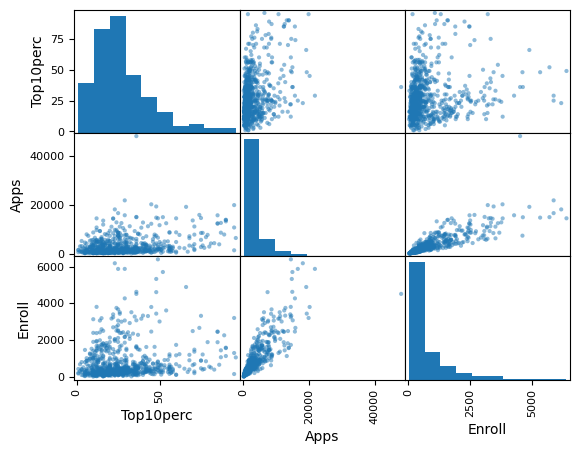

In [11]:
# Set column list for plotting
cols = ['Top10perc', 'Apps', 'Enroll']

pd.plotting.scatter_matrix(college[cols])
plt.show()

#### (e) Use the `boxplot()` method of `college` to produce side-by-side boxplots of `Outstate` versus `Private`.

**Answer:**

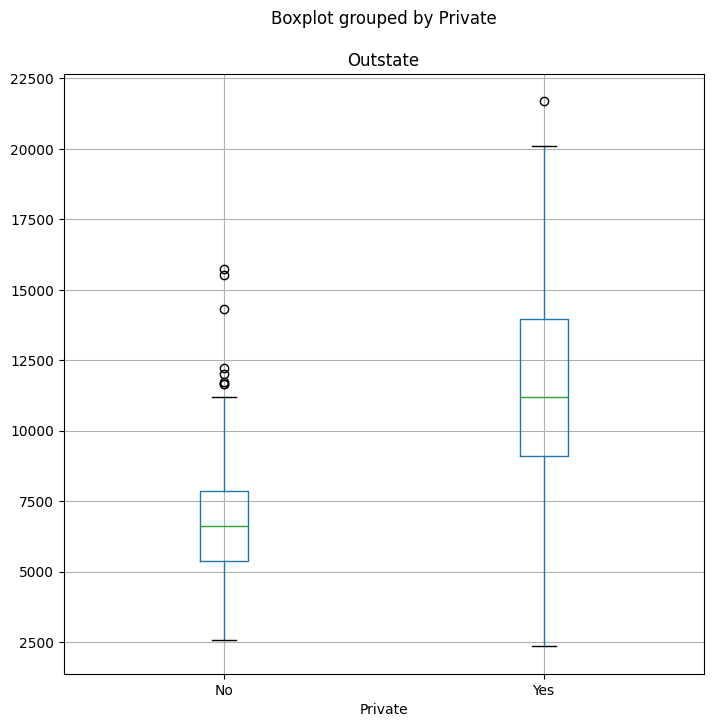

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
college.boxplot(column='Outstate', by='Private', ax=ax)
plt.show()

#### (f) Create a new qualitative variable, called `Elite`, by *binning* the `Top10perc` variable into two groups based on whether or not the proportion of students coming form the top 10% of their high school classes exceeds 50%.

In [13]:
college['Elite'] = pd.cut(college['Top10perc'],
                          [0, 50, 100],
                          labels=['No', 'Yes'])

Use the `value_counts()` method of `college['Elite']` to see how mnay elite universities there are. Finally, use the `boxplot()` method again to produce side-by-side boxplots of `Outstate` verses `Elite`.

**Answer:**

In [14]:
# See how many elite universities there are
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

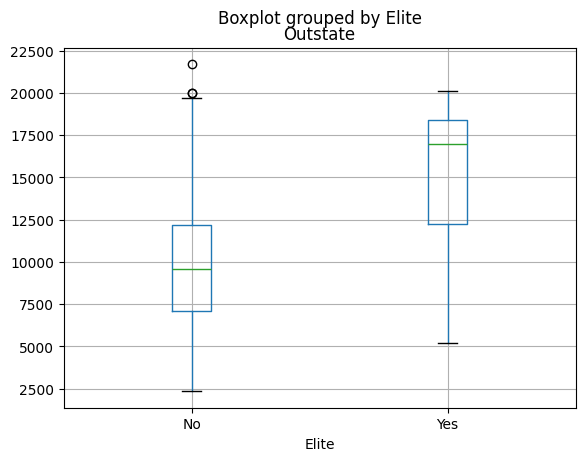

In [15]:
# Produce side-by-side boxplots of Outstate verses Elite
college.boxplot(column='Outstate', by='Elite')
plt.show()

#### (g) Use the `plot.hist()` method of `college` to produce some histograms with different numbers of bins for a few of the quantitative variables. Hint: the `plt.subplots(2,2)` may be useful.

**Answer:**

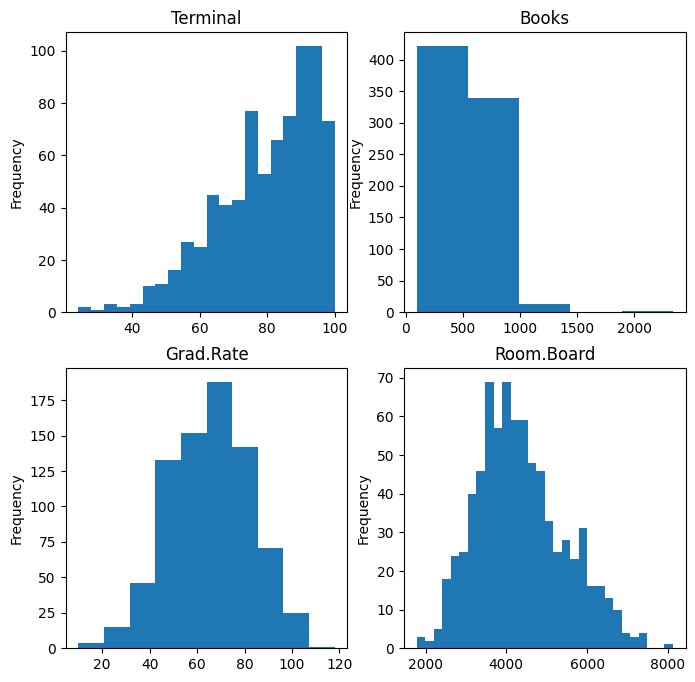

In [16]:
# Set the plot figure
fig, axes = plt.subplots(2,2, figsize=(8,8))

# Plot some histograms
college['Terminal'].plot.hist(ax=axes[0,0],bins=20)
axes[0,0].set_title('Terminal')

college['Books'].plot.hist(ax=axes[0,1], bins=5)
axes[0,1].set_title('Books')

college['Grad.Rate'].plot.hist(ax=axes[1,0], bins=10)
axes[1,0].set_title('Grad.Rate')

college['Room.Board'].plot.hist(ax=axes[1,1], bins=30)
axes[1,1].set_title('Room.Board')

plt.show() # Plot the figure

#### (h) Continue exploring the data, and provide a brief summary of what you discover.

Skipping this EDA for sake of time.

### Question 9

This exercise involves the `Auto` dataset studied in the lab. Make sure the missing values have been removed from the data.

In [17]:
# Load necessary packages
import pandas as pd

# Load the data
auto = pd.read_csv('Auto.data', na_values=['?'], sep='\\s+')

# Drop na values
auto = auto.dropna()

#### (a) Which of the predictors are quantitative, and which are qualitative?

**Answer:** First, we view the first few rows of the dataset.

In [18]:
# View first 3 rows
auto.head(n=3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


We can see the following breakdown in the data:

- Quantitative Predictors
    - `mpg`
    - `cylinders`
    - `displacement`
    - `horsepower`
    - `weight`
    - `acceleration`
    - `year`
- Qualitative Predictors
    - `origin`
    - `name`

#### (b) What is the *range* of each quantitative predictor? (Hint: You can answer this using the `min()` and `max()` methods in `numpy`.)

**Answer:** We find the following ranges for the quantitative predictors:

In [19]:
# List of quantitative predictors
quant_pred = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'year'
]

for pred in quant_pred:
    # Print out the range of the predictor
    print(f'Range of {pred}: {np.max(auto[pred]) - np.min(auto[pred])}')

Range of mpg: 37.6
Range of cylinders: 5
Range of displacement: 387.0
Range of horsepower: 184.0
Range of weight: 3527.0
Range of acceleration: 16.8
Range of year: 12


#### (c) What is the mean and standard deviation of each quantitative predictor?

**Answer:** Here is the mean and standard deviation of each quantitative predictor:

In [20]:
for pred in quant_pred:
    # Print out the mean
    print(f'{pred} - Mean: {round(np.mean(auto[pred]),2)}, Standard Deviation: {round(np.std(auto[pred]),2)}')

mpg - Mean: 23.45, Standard Deviation: 7.8
cylinders - Mean: 5.47, Standard Deviation: 1.7
displacement - Mean: 194.41, Standard Deviation: 104.51
horsepower - Mean: 104.47, Standard Deviation: 38.44
weight - Mean: 2977.58, Standard Deviation: 848.32
acceleration - Mean: 15.54, Standard Deviation: 2.76
year - Mean: 75.98, Standard Deviation: 3.68


#### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

**Answer:** First we remove the 10th through 85th observations.

In [21]:
# Create index list to subset to
idx_list = [x for x in auto.index if x < 10 or x > 85]

# Create subset
auto_sub = auto[auto.index.isin(idx_list)].copy().reset_index(drop=True)

# Print the range, mean, and standard deviatioon
for pred in quant_pred:
    print(f'{pred} - Range: {np.max(auto_sub[pred]) - np.min(auto_sub[pred])}, ' +
        f'Mean: {round(np.mean(auto_sub[pred]),2)}, ' +
        f'Standard Deviation: {round(np.std(auto[pred]),2)}')

mpg - Range: 35.6, Mean: 24.37, Standard Deviation: 7.8
cylinders - Range: 5, Mean: 5.38, Standard Deviation: 1.7
displacement - Range: 387.0, Mean: 187.88, Standard Deviation: 104.51
horsepower - Range: 184.0, Mean: 101.0, Standard Deviation: 38.44
weight - Range: 3348.0, Mean: 2938.85, Standard Deviation: 848.32
acceleration - Range: 16.3, Mean: 15.7, Standard Deviation: 2.76
year - Range: 12, Mean: 77.12, Standard Deviation: 3.68


#### (e) Using the full dataset, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationship among the predictors. Comment on your findings.

**Answer:** Skipping this EDA for now.

#### (f) Suppose that we wish to predict gas mileage (`mpg`) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting `mpg`? Justify your answer.

**Answer:** Skipping this EDA for now.

### Question 10

This exercise involves the `Boston` housing dataset.

#### (a) To begin, load in the `Boston` data set, which is part of the `ISLP` library.

**Answer:**

In [35]:
# Load in the dataset
boston = pd.read_csv('Boston.csv')

#### (b) How many rows are in this dataset? How many columns? What do the rows and columns represent?

**Answer:** We can find out the number of rows and columns using the `shape` method from `pandas`.

In [36]:
# Get the number of (rows, columns) from the dataset
boston.shape

(506, 14)

We see there are 506 rows and 14 columns. The rows represent each observation within the Boston housing dataset, and the columns represent each variable. More specifically, each row corresponds to a suburb of Boston. Each column corresponds to the following:

- `crim`: per capita crime rate by town.
- `zn`: proportion of residential land sonzed for lots over 25,000 sq.ft.
- `indus`: proportion of non-retail business acres per town.
- `chas`: Charles River dummy variable (1 if tract bounds river, 0 otherwise).
- `nox`: nitrogen oxides concentration (parts per 10 million).
- `rm`: average number of rooms per dwelling.
- `age`: proportion of overner-occupied units built prior to 1940.
- `dis`: weighted mean of distances to five Boston employment centers.
- `rad`: index of accessibility to radial highways.
- `tax`: full-value property-tax rate per $10,000.
- `ptratio`: pupil-teacher ratio by town.
- `lstat`: lower status of the population (percent)
- `medv`: median value of owner-occupied homes in $1,000s.


#### (c) Make some pairwise scatterplots of the predictors (columns) in this dataset. Describe your findings.

**Answer:** Note that all variables are quantitative, except for `chas` as it is a dummy indicator variable. Let's review the dataset to make sure it's in the right shape to pass to our plotting function.

In [37]:
# Get the first 3 rows of the dataset
boston.head(3)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


We can see that we first need to rescpoe the index as the `Unnamed:0` column.

In [40]:
# Read in the data accounting for the index column
boston = pd.read_csv('Boston.csv', index_col=0)
boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


Now we drop the `chas` variables and create a scatterplot matrix with all columns.

In [59]:
np.array_split(boston.drop(['crim', 'chas'], axis=1).columns, 3)

[Index(['zn', 'indus', 'nox', 'rm'], dtype='object'),
 Index(['age', 'dis', 'rad', 'tax'], dtype='object'),
 Index(['ptratio', 'lstat', 'medv'], dtype='object')]

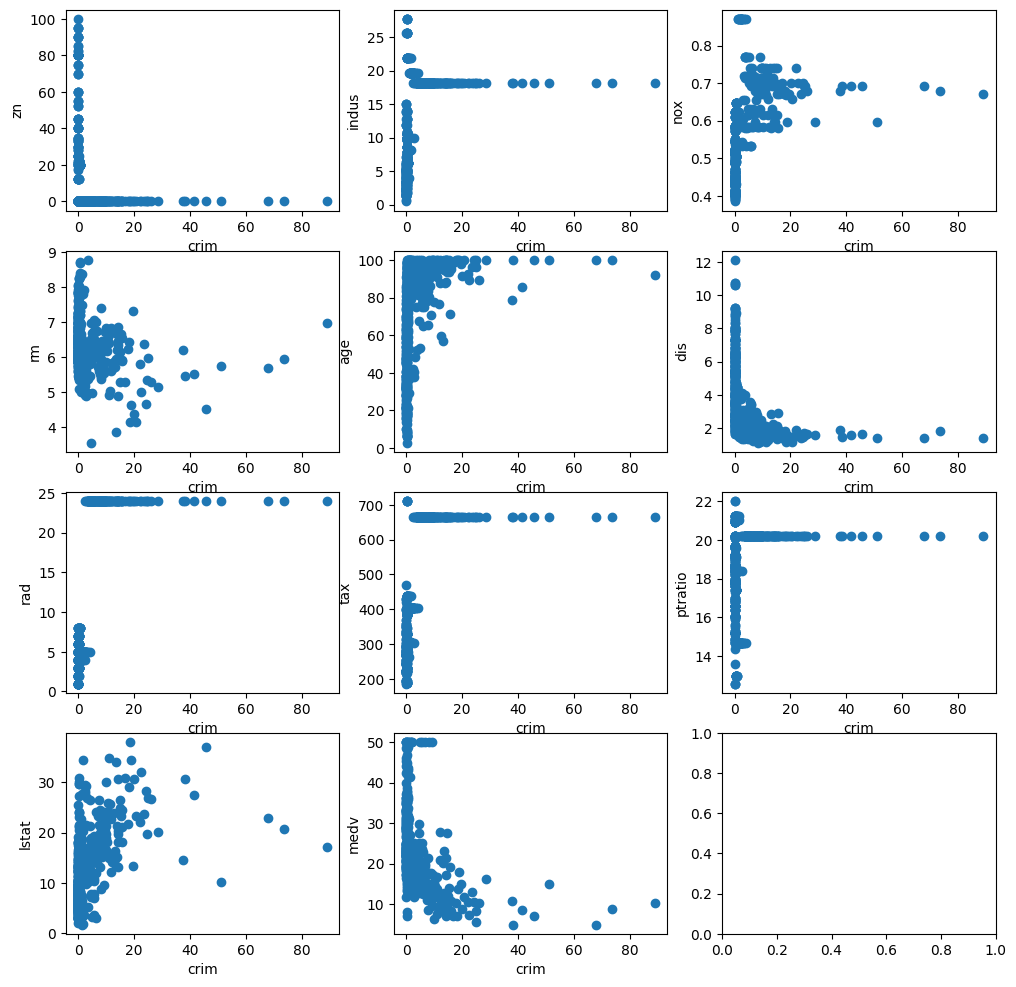

In [ ]:
num_rows = 4 # Number of rows in the plot

# Set up the subplots
fig, axes = plt.subplots(num_rows, int(np.ceil((len(boston.columns)-2) / num_rows)), figsize=(12,12))

# Set up the target column and lists of columns to plot
target_col = boston.crim
col_to_plot = np.array_split(boston.drop(['crim', 'chas'], axis=1).columns, num_rows)

# Plot the graphs
for ax_row, col_list in zip(axes, col_to_plot):
    for ax, col in zip(ax_row, col_list):
        ax.scatter(target_col, boston[col])
        ax.set_xlabel('crim')
        ax.set_ylabel(col)

When comparing with the target column of `crim`, we can see a few variables appear to have a relationship. Notably, none of the variables appear to have a strong linear relationship, but we can see that there appear to be logarithmic relationships among the predictors. For example, we can see a relationship between `medv` and `crim`, `dis` and `crim`, and `age` and `crim`.

Namely, the closer to a Boston unemployment center the higher the crime statistic. Similarly, the higher the median value home, the lower the crime rate indicating that crime is more likely in poorer zones.

#### (d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

**Answer:** Reviewing the `crim` column above, we can see that there appear to be some logarithmic relationships with the variables `age`, `dis`, `lstat`, and `medv`. As mentioned before, older ages are associated with more crime, lower `dis` is associated with more crime (closer to a Boston unemployment center), more `lstat` is associated with more crime (lower populations associated with more crime), and higher `medv` is associated with lower crime (wealthier areas have less crime).

#### (e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

**Answer:** We can access which suburbs have particularly high crime rates by examing which observations are outside the upper Inner Quartile Range (IQR). We will perform this analysis for each variable.

In [67]:
# Columns to check
col_list = ['crim', 'tax', 'ptratio']

for col in col_list:
    # Get the range
    col_range = np.max(boston[col]) - np.min(boston[col])

    # Get the 25th and 75th 
    Q1 = boston[col].quantile(0.25)
    Q3 = boston[col].quantile(0.75)

    # Get the IQR
    IQR = Q3 - Q1

    # Get outlier boundary
    upper_bound = Q3 + 1.5 * IQR

    # Count number of suburbs outside the upper bound
    outlier_count = len(boston[boston[col]>upper_bound])

    print(f'Range of {col}: {col_range}')
    print(f'Count of outliers with particularly high values: {outlier_count}')

Range of crim: 88.96988
Count of outliers with particularly high values: 66
Range of tax: 524
Count of outliers with particularly high values: 0
Range of ptratio: 9.4
Count of outliers with particularly high values: 0


We can see that there are 66 suburbs that have particularly high crime rates, but there do not appear to be any suburbs that have particularly high tax rates or pupil-teacher ratios. It is worth noting that the tax range is quite high as it is $524 out of $1000, along with the crime range which is 88 per capita.

#### (f) How many of the suburbs in this dataset bound the Charles river?

**Answer:** We can find this amount by filtering on the `chas` variable and checking the length of the array.

In [69]:
# Filter on chas and count
chas_count = (boston['chas']==1).sum()

print(f'{chas_count} many suburbs bound the Charles River.')

35 many suburbs bound the Charles River.


#### (g) What is the median pupil-teacher ratio among the towns in this dataset?

**Answer:** We can find this by using the `np.median()` method.

In [70]:
# Find the median pupil-teacher ratioo
med_ptratio = np.median(boston['ptratio'])

print(f'The median pupil-teacher ratio is {med_ptratio}.')

The median pupil-teacher ratio is 19.05.


#### (h) Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

**Answer:** We can answer this question by first filtering to the lowest median value of owner-occupied homes, and then calculating the percentile of the other predictors.

In [74]:
# Import necessary package
from scipy.stats import percentileofscore

# Filter to the lowest median value of owner-occupied homes
min_medv = np.min(boston['medv'])
min_medv_sub = boston[boston.medv==min_medv]

for idx, row in min_medv_sub.iterrows():
    print('-'*50)
    for col in boston.drop(['medv', 'chas'], axis=1).columns:
        print(f'Percentile of {col}: {percentileofscore(boston[col], row[col])}')

--------------------------------------------------
Percentile of crim: 98.81422924901186
Percentile of zn: 36.85770750988142
Percentile of indus: 75.7905138339921
Percentile of nox: 84.48616600790514
Percentile of rm: 7.707509881422925
Percentile of age: 95.8498023715415
Percentile of dis: 5.7312252964426875
Percentile of rad: 87.05533596837944
Percentile of tax: 86.06719367588933
Percentile of ptratio: 75.19762845849802
Percentile of lstat: 97.82608695652173
--------------------------------------------------
Percentile of crim: 99.60474308300395
Percentile of zn: 36.85770750988142
Percentile of indus: 75.7905138339921
Percentile of nox: 84.48616600790514
Percentile of rm: 13.636363636363637
Percentile of age: 95.8498023715415
Percentile of dis: 4.150197628458498
Percentile of rad: 87.05533596837944
Percentile of tax: 86.06719367588933
Percentile of ptratio: 75.19762845849802
Percentile of lstat: 89.92094861660078


We can immediately see that the two identified suburbs have some of the highest crime rates in all of Boston, with less than 2% of all suburbs having more crime. They also contain some of the oldest homes in all Boston, have a very high pupil-teacher ratio (i.e., less teachers in the region). Their tax rate is also fairly high, and are the closests in distance to a Boston unemployment center. They have above average nitrogen oxide ratings, and have some of the highest proportion of lower status citizens in all the city.

#### (i) In this dataset, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

**Answer:** We can find this answer by subsetting on the data.

In [75]:
# Set our filtering conditions
more_7 = boston.rm > 7
more_8 = boston.rm > 8

# Count the number of suburbs with more than 7 rooms per dwelling
print(f'{more_7.sum()} suburbs have on average more than seven rooms per dwelling.')
print(f'{more_8.sum()} suburbs have on average more than eight rooms per dwelling.')

64 suburbs have on average more than seven rooms per dwelling.
13 suburbs have on average more than eight rooms per dwelling.


We can review the suburbs that have more than eight rooms per dwelling:

In [76]:
# View suburbs with more than eight rooms per dwelling
boston[more_8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
258,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0


We can see that almost all of the suburbs listed do not border the Charles River. We can also ee that they have some of the lowest crime rates in all of Booston, have very low pupil-teacher ratios, and very low amounts of nitrogen oxide in the air. We can also see that some of them have a very high proportion of homes built before the 1940s, while a few of the suburbs contain newer homes built after the 40s.